# **1. Perkenalan Dataset**


Dataset yang digunakan dalam Eksperimen MSML ini yaitu Dataset terkait prediksi banjir dengan nama file "Flood Prediction Dataset", dimana data tersebut termasuk ke kategori Time series serta bersumber dari Kaggle.

# **2. Import Library**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, KBinsDiscretizer
from sklearn.impute import SimpleImputer
import os

# **3. Memuat Dataset**

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rga1432","key":"a106c2137d534f0f3cb6921a448deb9b"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d naiyakhalid/flood-prediction-dataset -p /content

Dataset URL: https://www.kaggle.com/datasets/naiyakhalid/flood-prediction-dataset
License(s): CC0-1.0
  0% 0.00/28.6M [00:00<?, ?B/s]
100% 28.6M/28.6M [00:00<00:00, 1.58GB/s]


In [5]:
!unzip /content/flood-prediction-dataset.zip

Archive:  /content/flood-prediction-dataset.zip
  inflating: flood.csv               
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [6]:
df = pd.read_csv('/content/flood.csv')

# **4. Exploratory Data Analysis (EDA)**

In [7]:
df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

In [9]:
df.shape

(50000, 21)

In [10]:
df.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,4.991480,4.984100,5.01594,5.008480,4.989060,4.988340,5.01536,4.988600,5.006120,5.006380,...,5.006060,4.999920,4.984220,4.97982,4.988200,4.984980,5.00512,4.994360,4.990520,0.499660
std,2.236834,2.246488,2.23131,2.222743,2.243159,2.226761,2.24500,2.232642,2.234588,2.241633,...,2.238107,2.247101,2.227741,2.23219,2.231134,2.238279,2.23176,2.230011,2.246075,0.050034
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.285000
25%,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.00000,3.000000,3.000000,0.465000
50%,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000,5.000000,5.000000,0.500000
75%,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.00000,6.000000,6.000000,0.535000
max,16.000000,18.000000,16.00000,17.000000,17.000000,17.000000,16.00000,16.000000,16.000000,18.000000,...,17.000000,17.000000,16.000000,16.00000,17.000000,19.000000,22.00000,16.000000,16.000000,0.725000


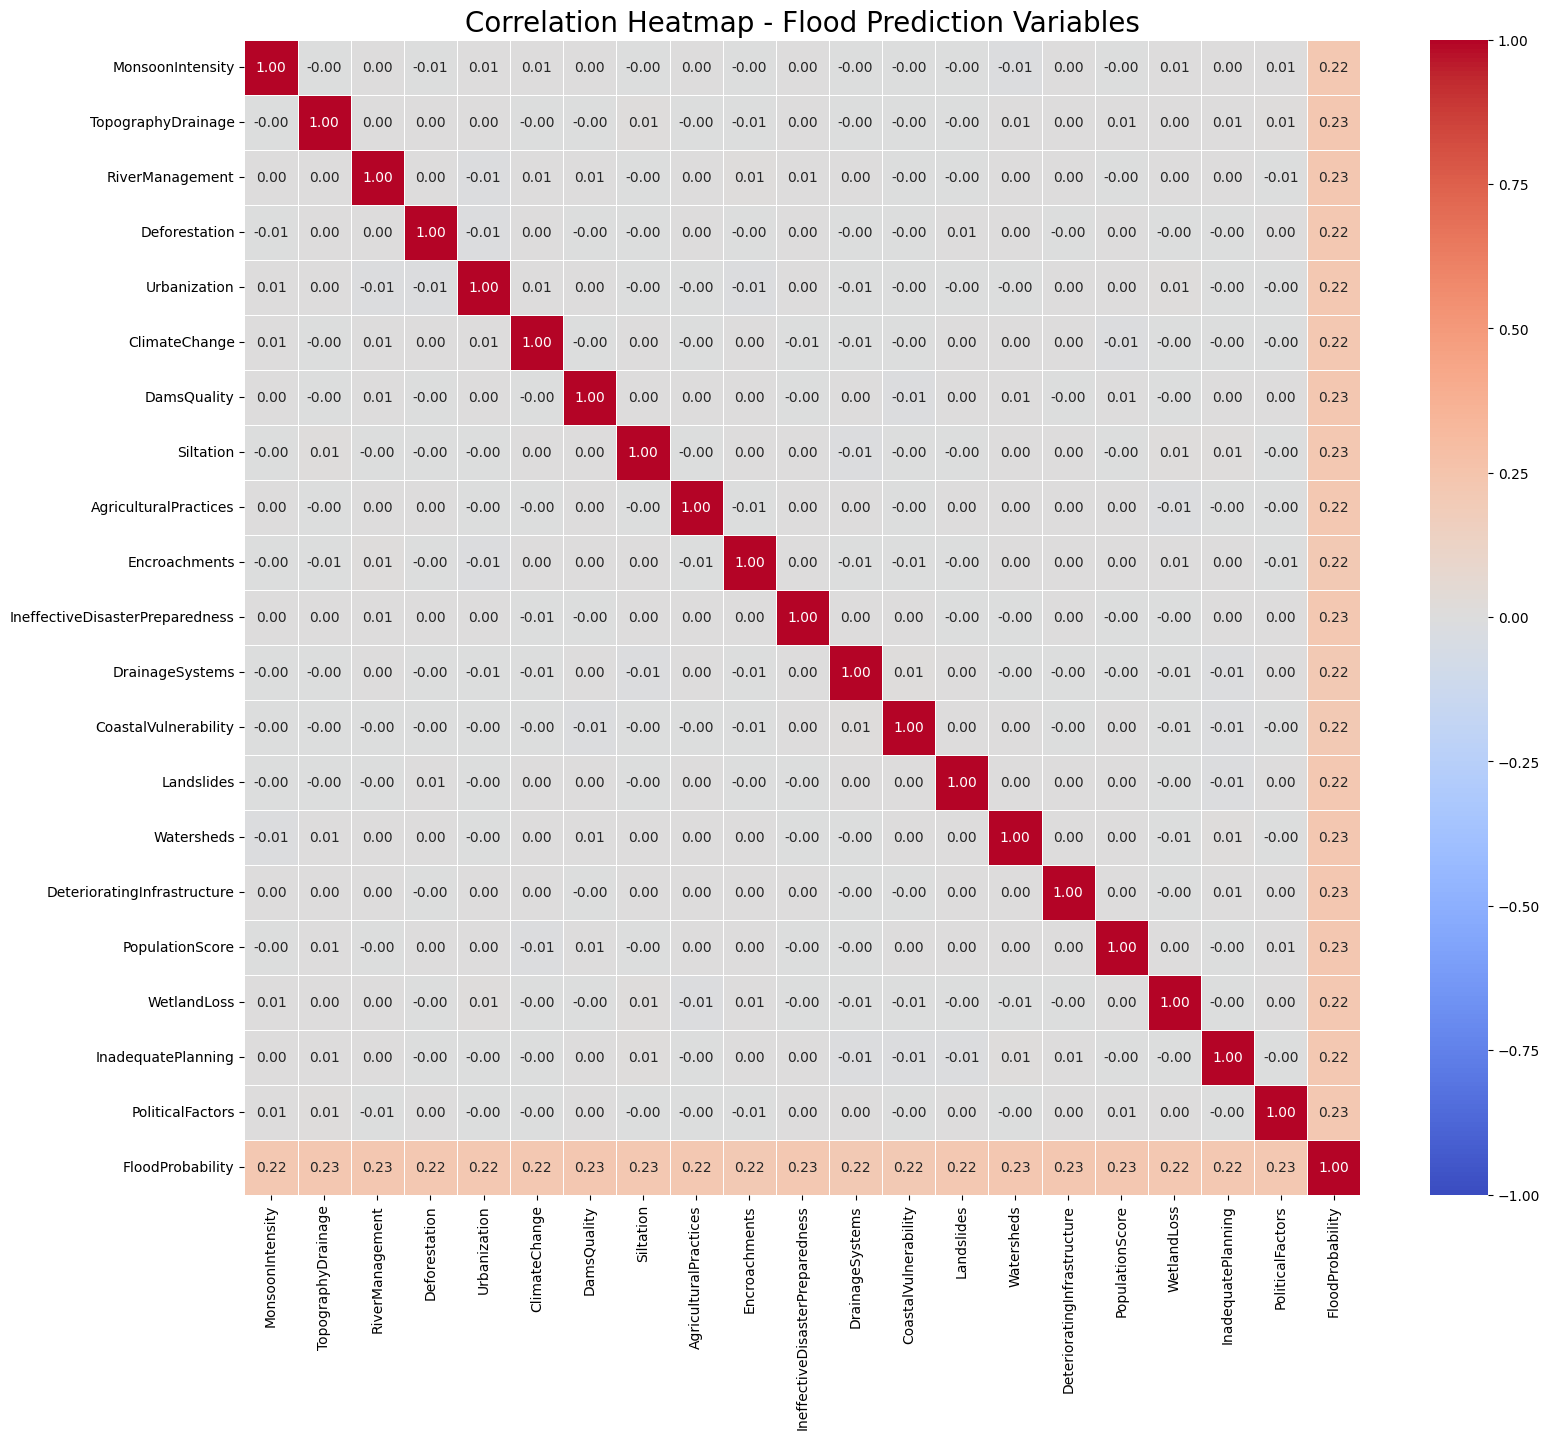

In [11]:
plt.figure(figsize=(18, 15))
correlation_matrix = df.corr()

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    vmin=-1, vmax=1
)

plt.title('Correlation Heatmap - Flood Prediction Variables', fontsize=20)
plt.show()

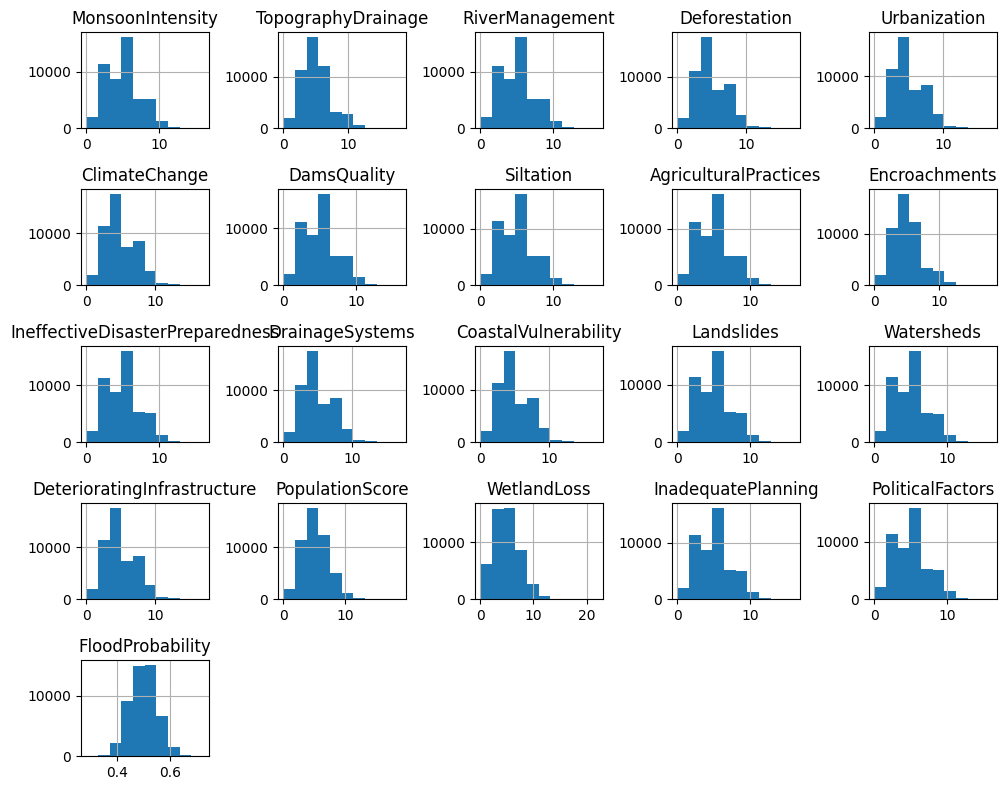

In [12]:
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

In [13]:
df.isnull().sum()

,0
MonsoonIntensity,0
TopographyDrainage,0
RiverManagement,0
Deforestation,0
Urbanization,0
ClimateChange,0
DamsQuality,0
Siltation,0
AgriculturalPractices,0
Encroachments,0


In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.drop_duplicates()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3,7,4,7,5,9,4,6,10,4,...,7,3,8,8,6,1,5,4,2,0.535
49996,3,10,3,8,3,3,4,4,3,11,...,8,6,3,6,4,4,2,4,5,0.510
49997,4,4,5,7,2,1,4,5,6,7,...,4,6,4,1,5,1,6,4,3,0.430
49998,4,5,4,4,6,3,10,2,6,11,...,6,3,4,7,6,2,4,0,11,0.515


In [16]:
df.shape

(50000, 21)

In [18]:
X = df.drop('FloodProbability', axis=1)
y = df['FloodProbability']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_final = pd.DataFrame(X_scaled, columns=X.columns)
y_final = y

X_final.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,-0.890321,1.342509,0.441028,0.446084,-0.440927,-0.443851,0.438597,-1.338607,-0.897767,-1.341169,-0.002255,2.231345,0.890080,-0.441806,-1.334944,-0.891125,-0.440066,-0.898457,-1.342769,0.449446
1,1.345004,-0.438066,-0.007144,0.895983,0.896486,1.801586,-1.788597,0.005106,-0.002739,-0.448954,0.446970,1.784535,-1.335031,0.455973,-1.334944,-1.787539,-1.780394,1.790031,-1.791202,-0.886231
2,-0.890321,2.232796,-0.455316,-1.803411,0.896486,0.005236,-0.452281,0.900915,-0.450253,1.781585,-1.349932,0.890914,-0.444987,-0.441806,1.353026,0.453496,-1.780394,1.341950,-0.894336,0.449446
3,-0.443256,-0.438066,-1.351659,0.895983,-0.886732,-0.443851,-1.788597,-0.442798,0.444776,-0.448954,1.794647,-0.449518,-1.335031,0.455973,0.457036,1.349910,1.347039,0.445787,0.450962,2.230349
4,-0.890321,0.897365,-0.007144,-1.353512,0.004877,1.352498,-0.006842,-1.338607,0.892290,-0.002846,0.896196,0.890914,0.445058,0.007083,-0.886949,-0.891125,-0.440066,-0.450375,-0.894336,-0.441005


# **6. Splitting & Saving**

In [20]:
# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [22]:
# Simpan ke Folder
output_folder = 'Flood_Preprocessing'
os.makedirs(output_folder, exist_ok=True)

X_train.to_csv(os.path.join(output_folder, 'X_train.csv'), index=False)
X_test.to_csv(os.path.join(output_folder, 'X_test.csv'), index=False)
y_train.to_csv(os.path.join(output_folder, 'y_train.csv'), index=False)
y_test.to_csv(os.path.join(output_folder, 'y_test.csv'), index=False)

print(f" Data Preprocessing berhasil disimpan di folder: {output_folder}")

 Data Preprocessing berhasil disimpan di folder: Flood_Preprocessing
